# Introduction

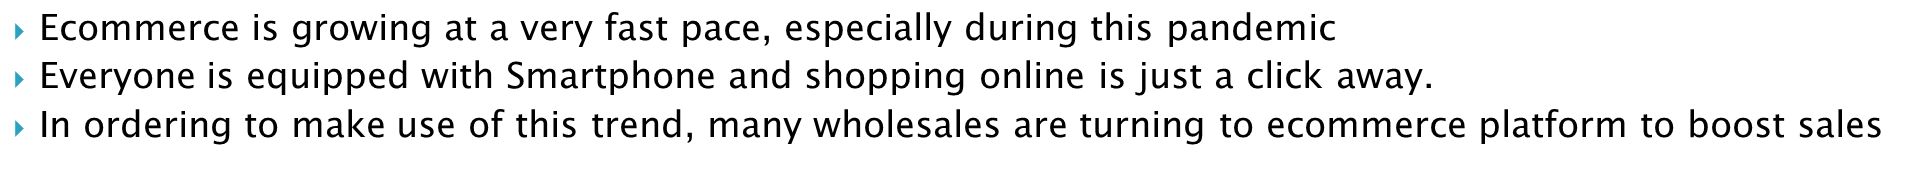


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
#Loading datasets

retail_df = pd.read_csv('Online_Retail.csv',encoding='unicode_escape')


In [159]:
#check the head of the dataset
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [160]:
#Check number of invoices without CustomerID
empty_custid_df=retail_df[retail_df.CustomerID.isnull() ]
print("There are",empty_custid_df.InvoiceNo.nunique(),"invoices without customer ID." )

There are 3710 invoices without customer ID.


In [161]:
#Check number of invoices with CustomerID
custid_df=retail_df[~retail_df.CustomerID.isnull() ]
print("There are",custid_df.InvoiceNo.nunique(),"invoices with customer ID." )

There are 22190 invoices with customer ID.


In [162]:
#Check Zero price
item_zunitprice_df=retail_df[retail_df['UnitPrice']==0]
no_item_zunitprice=item_zunitprice_df.UnitPrice.count()
no_invoice_item_zunitprice=item_zunitprice_df.InvoiceNo.count()
print("There are",no_item_zunitprice,"item with zero unit price in",no_invoice_item_zunitprice,"invoices.\n" )

There are 2515 item with zero unit price in 2515 invoices.



In [163]:
display(retail_df.describe())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The minimum value reflect negative figures. Based on this, this could mean cancellation of order or reject items.

# Cancelled Orders/Refund items/Payment
In order to confirm my hypothesis,let explore further into the invoices details.

In [164]:
neg_data= retail_df.loc[retail_df['Quantity']<0]
neg_data.InvoiceNo.unique() 

array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], dtype=object)

In [165]:
#Checking if all the invoices no starting with C, do not have data in customer ID column and $0 in unit price column
neg_data_no_custid=neg_data.loc[(~neg_data['InvoiceNo'].str.contains('C'))& (neg_data['CustomerID'].isnull())& (neg_data['UnitPrice']==0)]
neg_data_no_custid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom


In [166]:
display(retail_df[retail_df['InvoiceNo']=='536589'])
print("There are a total of",neg_data_no_custid.InvoiceNo.nunique(),"invoices with no customerID.\nWith the sample invoice extracted,I deduce that invoices not starting with 'C' might be raised to deduct damaged items because no unit price is indicated.")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom


There are a total of 1336 invoices with no customerID.
With the sample invoice extracted,I deduce that invoices not starting with 'C' might be raised to deduct damaged items because no unit price is indicated.


In [167]:
neg_data_custid=neg_data.loc[(neg_data['InvoiceNo'].str.contains('C'))& (neg_data['CustomerID'].isnull())]
neg_data_custid.Description.unique()

array(['ENAMEL MEASURING JUG CREAM', '4 TRADITIONAL SPINNING TOPS',
       'S/6 WOODEN SKITTLES IN COTTON BAG', 'ALPHABET STENCIL CRAFT',
       'TRADITIONAL WOODEN SKIPPING ROPE', "POPPY'S PLAYHOUSE BATHROOM",
       'MEASURING TAPE BABUSHKA RED', 'ROUND SNACK BOXES SET OF 4 SKULLS',
       'RED  HARMONICA IN BOX ', 'ROTATING SILVER ANGELS T-LIGHT HLDR',
       "POPPY'S PLAYHOUSE KITCHEN", 'CHRISTMAS LIGHTS 10 VINTAGE BAUBLES',
       '10 COLOUR SPACEBOY PEN', 'PAPER CHAIN KIT LONDON',
       'FELTCRAFT CHRISTMAS FAIRY', 'CHRISTMAS CRAFT TREE TOP ANGEL',
       'ROUND SNACK BOXES SET OF 4 FRUITS ', 'MAGIC DRAWING SLATE PURDEY',
       'EIGHT PIECE DINOSAUR SET', 'FAIRY TALE COTTAGE NIGHTLIGHT',
       'Bank Charges', 'SAMPLES', 'AMAZON FEE', 'Manual',
       'GUMBALL COAT RACK', 'SET OF 3 CAKE TINS PANTRY DESIGN ',
       'BINGO SET', 'OCEAN SCENT CANDLE IN JEWELLED BOX', 'POSTAGE',
       'SAVOY ART DECO CLOCK', 'BLUE GEISHA GIRL ',
       'PINK LOVE BIRD CANDLE', 'RETROSPOT BABUSHKA

While checking for distinct description, i chanced upon 'Amazon Fees'and 'DOTCOM POSTAGE'  in the description column with invoiceno starts with 'C'. I decide to get more insights by checking all the invoices that have 'Amazon Fees' or 'DOTCOM POSTAGE'or 'CRUK Commission'

In [168]:
#Extract all invoice with 'AMAZON FEE'
amazon_df=retail_df[(retail_df['Description']=='AMAZON FEE')]#|(retail_df['StockCode']=='DOT')
amazon_df.CustomerID.unique()

array([nan])

In [169]:
#Extract all invoice with 'CRUK Commission'
CRUK_df=retail_df[(retail_df['Description']=='CRUK Commission')]#|(retail_df['StockCode']=='DOT')
CRUK_df.CustomerID.unique()

array([14096.])

After studying the extracted, I deduce that invoices that starts with 'C' might be fee payment to Amazon and commission payment to Cancer Research UK for the products that they were sold on their ecommerce website.

In [170]:
#Extract all invoice with 'DOTCOM POSTAGE'
dotcom_df=retail_df[(retail_df['Description']=='DOTCOM POSTAGE')]#|(retail_df['StockCode']=='DOT')
dotcom_df.CustomerID.unique()

array([   nan, 14096.])

Based on the extracted data of Amazon Fee and Dotcom postage, this company has already used marketing their products on the Amazon, Dotcom and Cancer Research UK ecommerce website . With this data, we will be able to further explore deeper on how these website performing. Also Customer ID,14096, belongs to CRUK online shop account.

# Data Cleaning for Analysis

In [171]:
retail_data=retail_df[:]
retail_data['InvoiceDate']=pd.to_datetime(retail_data['InvoiceDate']) # Different Format
retail_data['DOW']=retail_data.InvoiceDate.dt.day_name()
retail_data['Month']=retail_data.InvoiceDate.dt.month
retail_data['Year']=retail_data.InvoiceDate.dt.year
retail_data['Revenue']=retail_data['Quantity']*retail_data['UnitPrice'] 
#Create Date dataframe for inner join
date=pd.DataFrame({ 'Date':['Jan_2011','Feb_2011','Mar_2011','Apr_2011','May_2011','Jun_2011','Jul_2011','Aug_2011','Sep_2011','Oct_2011','Nov_2011','Dec_2010','Dec_2011'],
                  'Month': [1,2,3,4,5,6,7,8,9,10,11,12,12],})
date['Year']=2011
date.loc[date['Date']=='Dec_2010','Year']=2010
retail_data=retail_data.merge(date, how='inner', on=['Year','Month'])
retail_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DOW,Month,Year,Revenue,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,12,2010,15.30,Dec_2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,2010,20.34,Dec_2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,12,2010,22.00,Dec_2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,2010,20.34,Dec_2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,12,2010,20.34,Dec_2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,12,2011,10.20,Dec_2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,12,2011,12.60,Dec_2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,12,2011,16.60,Dec_2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,12,2011,16.60,Dec_2011


# Frequency of returning customers
This analysis does not include sales from ecommerce website.

In [172]:
#Drop rows with empty customer ID 
return_df=retail_data[:]
return_df.dropna(subset=['CustomerID'], inplace=True)


<ipython-input-172-06c610057195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df.dropna(subset=['CustomerID'], inplace=True)


Transaction analysis does not include Online sales, therefore customerID,14096,transaction will be removed from the dataset below.

In [173]:

return_df.drop(return_df.loc[return_df['CustomerID']==14096].index,inplace=True)
return_df["CustomerID"] = return_df["CustomerID"].astype(int)


C:\Study\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-173-4b88ca712b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df["CustomerID"] = return_df["CustomerID"].astype(int)


In [174]:
#Drop all data that is not required
#POST >> Normal Postage/Delivery Cost, 
#Bank Charges >> Administration Charges
#They are not part of the revenue

index_names = return_df[ return_df['StockCode'].isin(['BANK CHARGES','POST'])].index
return_df.drop(index_names, inplace = True) 

return_df.InvoiceNo.nunique()

22027

In [175]:
#Checking if the data has been dropped
return_df[return_df['StockCode'].isin(['BANK CHARGES','POST'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DOW,Month,Year,Revenue,Date


In [176]:
#Check data type
return_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
DOW                    object
Month                   int64
Year                    int64
Revenue               float64
Date                   object
dtype: object

In [177]:
# Data Extraction for 'CustomerID','Year','InvoiceNo','Revenue'
return_data2=return_df.loc[:,['CustomerID','Year','InvoiceNo','Revenue','Quantity']]
return_data2.InvoiceNo.nunique()

22027

In [178]:
#Create Groupby DF by suming all the revenue line for each invoice
#invoice_count column is so that omit credit note from the no of purchase counting 
return_data3=return_data2.groupby(['CustomerID','Year','InvoiceNo'])['Revenue','Quantity'].agg({'Revenue': ['sum'],'Quantity' : ['sum']}).reset_index()
replace_col_list = list(return_data3.columns.get_level_values(0))# Create List first
replace_col_list[-1] = 'Quantity' 
replace_col_list[-2] = 'Revenue' 
# replace_col_list
return_data3.columns = replace_col_list
return_data3['invoice_count']=1
return_data3.loc[return_data3['InvoiceNo'].str.contains('C'), 'invoice_count'] = 0
return_data3[return_data3['invoice_count']==1]#For Checking if invoice_count is correct
return_data3


<ipython-input-178-66cdc7b4213d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  return_data3=return_data2.groupby(['CustomerID','Year','InvoiceNo'])['Revenue','Quantity'].agg({'Revenue': ['sum'],'Quantity' : ['sum']}).reset_index()


,CustomerID,Year,InvoiceNo,Revenue,Quantity,invoice_count
0,12346,2011,541431,77183.60,74215,1
1,12346,2011,C541433,-77183.60,-74215,0
2,12347,2010,537626,711.79,319,1
3,12347,2011,542237,475.39,315,1
4,12347,2011,549222,636.25,483,1
...,...,...,...,...,...,...
22022,18283,2011,579673,223.61,134,1
22023,18283,2011,580872,208.00,142,1
22024,18287,2011,554065,765.28,488,1
22025,18287,2011,570715,1001.32,990,1


In [179]:
#Further sum the data by customerID,Year,Country
return_data4=return_data3.groupby(['CustomerID','Year'])['Revenue','invoice_count','Quantity'].agg({'Revenue':['sum'],'invoice_count':['sum'],'Quantity':['sum']}).reset_index()
replace_col_list2 = list(return_data4.columns.get_level_values(0))
replace_col_list2
replace_col_list2[-3] = 'TotalRevenue' 
replace_col_list2[-2] = 'NoOfPurchase' 
replace_col_list2[-1] = 'TotalQuantity' 
return_data4.columns =replace_col_list2
return_data4=return_data4[return_data4['TotalRevenue']!=0] #Omit Transaction that has $0 revenue because it has already being offset with a credit note
return_data4=return_data4[return_data4['NoOfPurchase']!=0] #Omit Transaction that has $0 revenue because it has already being offset with a credit note
return_data4['AvgRevenuePerTrans']=return_data4['TotalRevenue']/return_data4['NoOfPurchase']
return_data4['AvgRevenuePerTrans']=return_data4['AvgRevenuePerTrans'].round(2)
return_data4

<ipython-input-179-5caff31ac8ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  return_data4=return_data3.groupby(['CustomerID','Year'])['Revenue','invoice_count','Quantity'].agg({'Revenue':['sum'],'invoice_count':['sum'],'Quantity':['sum']}).reset_index()


,CustomerID,Year,TotalRevenue,NoOfPurchase,TotalQuantity,AvgRevenuePerTrans
1,12347,2010,711.79,1,319,711.79
2,12347,2011,3598.21,6,2139,599.70
3,12348,2010,652.80,1,1248,652.80
4,12348,2011,784.44,3,1084,261.48
5,12349,2011,1457.55,1,630,1457.55
...,...,...,...,...,...,...
5185,18280,2011,180.60,1,45,180.60
5186,18281,2011,80.82,1,54,80.82
5187,18282,2011,176.60,2,98,88.30
5188,18283,2011,2094.88,16,1397,130.93


In [180]:
#Data extraction for customer ID with transaction in both 2010 and 2011
return_2010=return_data4[return_data4['Year']==2010] 
return_2011=return_data4[return_data4['Year']==2011] 
return_combine=return_2010.merge(return_2011, how='inner', on=['CustomerID'],suffixes=('_2010', '_2011'))
return_combine['TotalQty']=return_combine['TotalQuantity_2010']+return_combine['TotalQuantity_2011']
return_combine['TotalPurchase']=return_combine['NoOfPurchase_2010']+return_combine['NoOfPurchase_2011']
return_combine['TotalRevenue']=return_combine['TotalRevenue_2010']+return_combine['TotalRevenue_2011']
return_combine['AvgPurchasePerCustomer']=return_combine['TotalRevenue']/return_combine['TotalPurchase']
return_combine['AvgPurchasePerCustomer']=return_combine['AvgPurchasePerCustomer'].round(2)
return_combine

,CustomerID,Year_2010,TotalRevenue_2010,NoOfPurchase_2010,TotalQuantity_2010,AvgRevenuePerTrans_2010,Year_2011,TotalRevenue_2011,NoOfPurchase_2011,TotalQuantity_2011,AvgRevenuePerTrans_2011,TotalQty,TotalPurchase,TotalRevenue,AvgPurchasePerCustomer
0,12347,2010,711.79,1,319,711.79,2011,3598.21,6,2139,599.70,2458,7,4310.00,615.71
1,12348,2010,652.80,1,1248,652.80,2011,784.44,3,1084,261.48,2332,4,1437.24,359.31
2,12370,2010,1748.02,2,965,874.01,2011,1677.67,2,1385,838.84,2350,4,3425.69,856.42
3,12377,2010,1001.52,1,604,1001.52,2011,546.60,1,338,546.60,942,2,1548.12,774.06
4,12383,2010,555.72,1,751,555.72,2011,1061.59,4,764,265.40,1515,5,1617.31,323.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,18229,2010,653.20,2,112,326.60,2011,6623.70,18,2376,367.98,2488,20,7276.90,363.84
761,18239,2010,438.10,1,208,438.10,2011,1123.51,4,587,280.88,795,5,1561.61,312.32
762,18245,2010,365.73,1,297,365.73,2011,2141.83,6,1484,356.97,1781,7,2507.56,358.22
763,18259,2010,376.30,1,116,376.30,2011,1962.30,2,598,981.15,714,3,2338.60,779.53


In [181]:
return_final=return_combine.loc[:,['CustomerID','TotalPurchase']]
return_final=return_final.groupby('TotalPurchase').count().reset_index()
replace_col_list3=list(return_final.columns.get_level_values(0))# Create List first
replace_col_list3[-1] = 'NoOfCustomer' 
return_final.columns=replace_col_list3
return_final

,TotalPurchase,NoOfCustomer
0,2,106
1,3,77
2,4,76
3,5,62
4,6,53
5,7,58
6,8,39
7,9,29
8,10,31
9,11,23


In [182]:
bins = [0,2,3, 4,5,6,7,8,9,10,11,12,15,20,25,30,40,50,210]
labels = ["2","3","4","5","6","7","8","9","10","11","12","13-15","16-20","21-25",'26-30','31-40','41-50','51-206']
return_final['bins'] = pd.cut(return_final['TotalPurchase'], bins=bins, labels=labels)
return_final=return_final.groupby('bins')['NoOfCustomer'].sum().reset_index()
return_final

,bins,NoOfCustomer
0,2,106
1,3,77
2,4,76
3,5,62
4,6,53
5,7,58
6,8,39
7,9,29
8,10,31
9,11,23


Text(0, 0.5, 'No Of Customer')

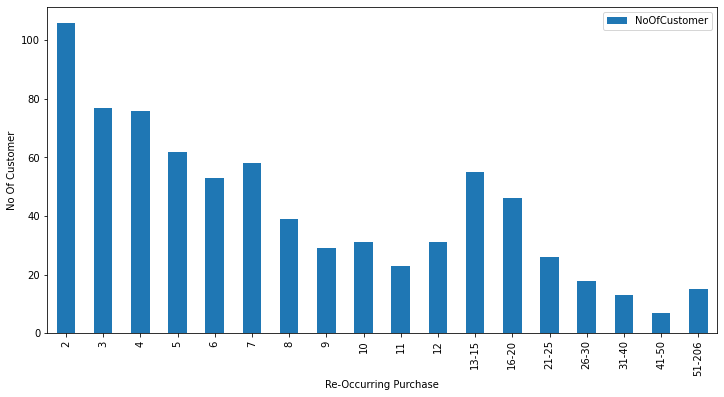

In [183]:
cust_freq=return_final.plot.bar(x='bins',y='NoOfCustomer',figsize=(12,6))
cust_freq.set_xlabel("Re-Occurring Purchase")
cust_freq.set_ylabel("No Of Customer")

# Top 10 Products' Purchase Rate
By studying this insight, allows us to find out what items has the highest purchase frequency rate.

In [184]:
cust_list=return_combine['CustomerID']
cust_list
# cust_list.to_list()

0      12347
1      12348
2      12370
3      12377
4      12383
       ...  
760    18229
761    18239
762    18245
763    18259
764    18260
Name: CustomerID, Length: 765, dtype: int64

In [185]:
loyal_cust_item=return_df[return_df['CustomerID'].isin(cust_list)]

In [186]:
index_names2 = loyal_cust_item[ (loyal_cust_item['StockCode'] == 'D') | (loyal_cust_item['StockCode'] == 'C2')].index
loyal_cust_item.drop(index_names2, inplace = True) 
loyal_cust_inv=loyal_cust_item.loc[:,['InvoiceNo']]
loyal_cust_inv.drop_duplicates(subset=['InvoiceNo'], inplace=True)


C:\Study\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [187]:
index = loyal_cust_inv.index
num_of_invoice=len(index)
num_of_invoice

9705

In [188]:
item_purchase_line=loyal_cust_item.loc[:,['InvoiceNo','StockCode','Description']]
item_freq=item_purchase_line.groupby(['StockCode','Description'])['InvoiceNo'].count().reset_index()
item_freq['PurchaseRate']= item_freq['InvoiceNo']/num_of_invoice*100
top10_item=item_freq.sort_values(by='PurchaseRate', ascending=False, na_position='first').head(10)
top10_item.rename(columns= {'InvoiceNo':'Freq'}, inplace=True)
top10_item

,StockCode,Description,Freq,PurchaseRate
3370,85123A,WHITE HANGING HEART T-LIGHT HOLDER,954,9.829985
1305,22423,REGENCY CAKESTAND 3 TIER,900,9.273570
3355,85099B,JUMBO BAG RED RETROSPOT,773,7.964967
3191,84879,ASSORTED COLOUR BIRD ORNAMENT,612,6.306028
168,20725,LUNCH BAG RED RETROSPOT,612,6.306028
2738,47566,PARTY BUNTING,565,5.821741
171,20727,LUNCH BAG BLACK SKULL.,523,5.388975
1592,22720,SET OF 3 CAKE TINS PANTRY DESIGN,485,4.997424
1598,22727,ALARM CLOCK BAKELIKE RED,464,4.781041
425,21212,PACK OF 72 RETROSPOT CAKE CASES,453,4.667697


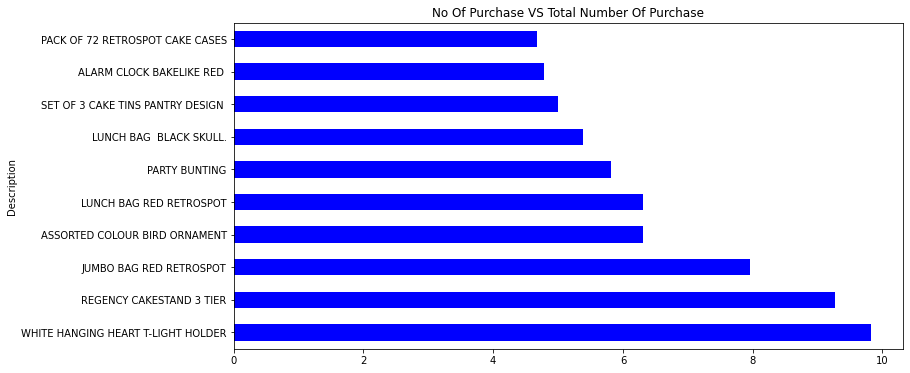

In [189]:
top10_item.plot(x = 'Description', 
        y = 'PurchaseRate', 
        kind = 'barh', 
        color = 'blue', 
        title = 'No Of Purchase VS Total Number Of Purchase', 
        figsize=[12,6],
        legend = False)
plt.show()


# Repeat Purchase Rate By Month
https://www.littlestreamsoftware.com/articles/repeat-purchase-rate-calculate/

In [190]:
rep_pur_data=return_df.loc[:,['CustomerID','Country','InvoiceNo','InvoiceDate','Date']]
rep_pur_data.drop_duplicates(subset=['InvoiceNo'], inplace=True)
rep_pur_data.drop(rep_pur_data.loc[rep_pur_data['InvoiceNo'].str.contains('C')].index, inplace=True)

In [191]:
rep_pur_data[rep_pur_data['InvoiceNo']=='537626']

,CustomerID,Country,InvoiceNo,InvoiceDate,Date
14938,12347,Iceland,537626,2010-12-07 14:57:00,Dec_2010


In [192]:
#Extracting First time purchase based on the first purchase date
inv_first_list=rep_pur_data.groupby(['CustomerID','Country'])['InvoiceDate','InvoiceNo'].min().reset_index()
inv_first_list.drop(inv_first_list.loc[inv_first_list['InvoiceNo'].str.contains('C')].index, inplace=True)
inv_first_list


<ipython-input-192-d8a40e0618fb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inv_first_list=rep_pur_data.groupby(['CustomerID','Country'])['InvoiceDate','InvoiceNo'].min().reset_index()


,CustomerID,Country,InvoiceDate,InvoiceNo
0,12346,United Kingdom,2011-01-18 10:01:00,541431
1,12347,Iceland,2010-12-07 14:57:00,537626
2,12348,Finland,2010-12-16 19:09:00,539318
3,12349,Italy,2011-11-21 09:51:00,577609
4,12350,Norway,2011-02-02 16:01:00,543037
...,...,...,...,...
4340,18280,United Kingdom,2011-03-07 09:52:00,545712
4341,18281,United Kingdom,2011-06-12 10:53:00,556464
4342,18282,United Kingdom,2011-08-05 13:35:00,562525
4343,18283,United Kingdom,2011-01-06 14:14:00,540350


In [193]:
#Creating Recurring column and FirstTimer columns to calculate number of customer on 
# their First  purchase and recurring purchase
return_df['Recurring']=1
return_df['FirstTimer']=1
return_df.loc[return_df['InvoiceNo'].isin(inv_first_list['InvoiceNo']),'Recurring']=0
return_df.loc[~return_df['InvoiceNo'].isin(inv_first_list['InvoiceNo']),'FirstTimer']=0
return_df.drop(return_df.loc[return_df['InvoiceNo'].str.contains('C')].index, inplace=True)
rpr_data=return_df.loc[:,['CustomerID','Year','Month','Date','InvoiceNo','Recurring','FirstTimer']]
rpr_data.drop_duplicates(subset=['InvoiceNo'], inplace=True)


<ipython-input-193-1352b246afc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['Recurring']=1
<ipython-input-193-1352b246afc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['FirstTimer']=1
C:\Study\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [194]:
rpr_data

,CustomerID,Year,Month,Date,InvoiceNo,Recurring,FirstTimer
0,17850,2010,12,Dec_2010,536365,0,1
7,17850,2010,12,Dec_2010,536366,1,0
9,13047,2010,12,Dec_2010,536367,0,1
21,13047,2010,12,Dec_2010,536368,1,0
25,13047,2010,12,Dec_2010,536369,1,0
...,...,...,...,...,...,...,...
541865,13777,2011,12,Dec_2011,581583,1,0
541867,13777,2011,12,Dec_2011,581584,1,0
541869,15804,2011,12,Dec_2011,581585,1,0
541890,13113,2011,12,Dec_2011,581586,1,0


In [195]:
rpr_sales=rpr_data.groupby(['Year','Month','Date'])['Recurring','FirstTimer'].sum().reset_index()
rpr_sales['TotalCustomer']=rpr_data['Recurring']+rpr_data['FirstTimer']
rpr_sales['RepeatPurchaseRate']=rpr_data['Recurring']/rpr_data['TotalCustomer']*100

<ipython-input-195-57b4bb757e0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rpr_sales=rpr_data.groupby(['Year','Month','Date'])['Recurring','FirstTimer'].sum().reset_index()


KeyError: 'TotalCustomer'

In [ ]:
rpr_sales.plot(kind='line',x='Date',y='RepeatPurchaseRate',marker='o',figsize=(14, 7),grid=True,title='Repeat Purchase Rate')

print(rpr_sales.sum())

Avg=14111/18456*100
Avg

The increase in the repeat purchase rate and the avg repeat percentage rate, indicates that there are more customer returning for their second purchase or more. The company should continue to improve the products offering or offers loyalty program in order to retain or attract more customers to increase their recurring purchase.

# Online Sales Trend
Amazon :https://www.amazon.co.uk/ref=nav_logo
CRUK : https://shop.cancerresearchuk.org/

In [ ]:
#Online data extraction
online_df=retail_data.loc[(retail_data['CustomerID']==14096)|retail_data['CustomerID'].isnull()]

In [ ]:
online_df

In [ ]:
#Create new column to indicate which ecommerce platform for sales segregation 
online_df['OnlinePlatform']='CRUK Online Shop'

Data with Dotcom postage is considered online because Dotcom provide Retail & Wholesale B2B Fulfillment.
Based on my study of the dataset, lines with empty customerID are online customer because the customer data might be kept on the ecommerce website

In [ ]:
#Extract invoices with Dotcom postage
dotcom=online_df[(online_df['StockCode']=='DOT')&(online_df['CustomerID']!=14096)]
dotcom_inv_list=dotcom.InvoiceNo.unique()
online_df.loc[online_df['InvoiceNo'].isin(dotcom_inv_list),'OnlinePlatform']='Dotcom'


In [ ]:
amazon=online_df[(online_df['OnlinePlatform']=='CRUK Online Shop')&(online_df['CustomerID']!=14096)]
amazon_inv_list=amazon.InvoiceNo.unique()
online_df.loc[online_df['InvoiceNo'].isin(amazon_inv_list),'OnlinePlatform']='Amazon'
amazon.StockCode.nunique()

In [ ]:
index_names2=online_df[online_df['StockCode'] == 'AMAZONFEE'].index
online_df.drop(index_names2, inplace = True) 

In [ ]:
Dotcom_item=online_df[online_df['OnlinePlatform']=='Dotcom']
Dotcom_item.StockCode.nunique()

In [ ]:
Amazon_item=online_df[online_df['OnlinePlatform']=='Amazon']
Amazon_item.StockCode.nunique()

In [ ]:
CRUK_item=online_df[online_df['OnlinePlatform']=='CRUK Online Shop']
CRUK_item.StockCode.nunique()

In [ ]:
online_data=online_df.groupby(['OnlinePlatform','Month','Year','Date'])['Revenue'].sum().reset_index()

In [ ]:
amazon_sales=online_data[online_data['OnlinePlatform']=='Amazon'].sort_values(by='Year', ascending=True).reset_index()
amazon_sales

In [ ]:
dotcom_sales=online_data[online_data['OnlinePlatform']=='Dotcom'].sort_values(by='Year', ascending=True).reset_index()
dotcom_sales

In [ ]:
cruk_sales=online_data[online_data['OnlinePlatform']=='CRUK Online Shop'].sort_values(by='Year', ascending=True)
cruk_sales

In [ ]:
#Merge all 3 dataframe together so that it will be easier to plot the graph
comb=pd.merge(pd.merge(amazon_sales,dotcom_sales,how='inner',on=['Date','Year','Month'],suffixes=('_Amazon', '_Dotcom')),cruk_sales,how='left',on=['Date','Year','Month'])
# comb.fillna(0)
replace_col_list=list(comb.columns.get_level_values(0))# Create List first
replace_col_list[-1] = 'Revenue_CRUK' 
replace_col_list[-2] = 'OnlinePlatform_CRUK' 
replace_col_list
comb.columns = replace_col_list
comb.fillna(0)

In [ ]:
ax = plt.gca()
comb.plot(kind='line',x='Date',y='Revenue_Amazon',marker='o', color='red',grid=True,title='Online Sales Trend', ax=ax,figsize=(14, 7),label='Amazon Sales')
comb.plot(kind='line',x='Date',y='Revenue_Dotcom',marker='s',grid=True,title='Online Sales Trend',ax=ax,figsize=(14, 7),label='Dotcom Sales')
comb.plot(kind='line',x='Date',y='Revenue_CRUK',marker='s',grid=True,title='Online Sales Trend',ax=ax,figsize=(14, 7),label='CRUK Sales')
plt.show()


Looking at the line graph, the 3 lines graph are almost similar. it might be due to the fact that they are all within the same country. There is a dropped in sales if Dec 2011 is compared with Dec 2010. The company might want to relook at their  products offering or evaluate the sales team performance on the low sales. 

# Retail Sales Trend

In [ ]:
offline_df=retail_data.loc[(~retail_data['CustomerID'].isnull())& (retail_data['CustomerID']!=14096) ]

In [ ]:
offline_sales=offline_df.groupby(['Month','Year','Date'])['Revenue'].sum().reset_index().sort_values(by='Year', ascending=True)

In [ ]:
offline_sales

In [ ]:
#Merging the Retail sales to the online sales for plotting of graphs
comb2=comb.merge(offline_sales,on=['Month','Year','Date'])
comb2
replace_col_list6=list(comb2.columns.get_level_values(0))# Create List first
replace_col_list6[-1] = 'Revenue_Offline'  
replace_col_list6
comb2.columns = replace_col_list6
comb2

In [ ]:
ax = plt.gca()
comb2.plot(kind='line',x='Date',y='Revenue_Amazon',marker='o', color='red',grid=True,title='Sales Trend', ax=ax,figsize=(14, 7),label='Amazon Sales')
comb2.plot(kind='line',x='Date',y='Revenue_Dotcom',marker='s',grid=True,ax=ax,figsize=(14, 7),label='Dotcom Sales')
comb2.plot(kind='line',x='Date',y='Revenue_CRUK',marker='s',grid=True,ax=ax,figsize=(14, 7),label='CRUK Sales')
comb2.plot(kind='line',x='Date',y='Revenue_Offline',marker='s',grid=True,ax=ax,figsize=(14, 7),label='Offline Sales')

plt.show()

In [ ]:
offline_sales.plot(kind='line',x='Date',y='Revenue',grid=True,figsize=(14,7))

In [ ]:
offline_country=offline_df.groupby(['Month','Year','Date','Country'])['Revenue'].sum().reset_index().sort_values(by='Year', ascending=True)
offline_country

In [ ]:
heatmap1_data = pd.pivot_table(offline_country, values='Revenue', 
                     index=['Country'], 
                     columns=['Year','Month'],
                              )
heatmap1_data 

In [ ]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="RdBu")

It is clearly shown that majority of the sales are genereated by the United Kingdom and this is the company's homeland. 
Let's now take a closer look at the other countries.

In [ ]:
offline_country2=offline_country[~offline_country['Country'].isin(['United Kingdom','Unspecified'])]
offline_country2

In [ ]:
heatmap2_data = pd.pivot_table(offline_country2, values='Revenue', 
                     index=['Country'], 
                     columns=['Year','Month'],
                              )
heatmap2_data 

In [ ]:
plt.figure(figsize=(10, 14))
sns.heatmap(heatmap2_data, cmap="RdBu")

After United Kingdom, the next in line will be Netherland, France and EIR. Looking at this sales trend, the company might want to focus on how to boost the sales from these countries. 

# Top 3 Product Sales Trend
Studying this insight is to further understand the product trend 

In [ ]:
top10_product_sales_trend = retail_data[retail_data['StockCode'].isin(top10_item['StockCode'])]


In [ ]:
# Data Patching for items with same Stock Code
top10_product_sales_trend.loc[top10_product_sales_trend['Description']=='faulty' ,'Description']='REGENCY CAKESTAND 3 TIER'
top10_product_sales_trend.loc[top10_product_sales_trend['Description']=='ASSORTED COLOUR BIRD ORNAMENT\t','Description']='REGENCY CAKESTAND 3 TIER'
top10_product_sales_trend.loc[top10_product_sales_trend['StockCode']=='85123A' ,'Description']='WHITE HANGING HEART T-LIGHT HOLDER'
top10_product_sales_trend.loc[top10_product_sales_trend['StockCode']=='22423' ,'Description']='REGENCY CAKESTAND 3 TIER'
top10_product_sales_trend.loc[top10_product_sales_trend['StockCode']=='84879' ,'Description']='ASSORTED COLOUR BIRD ORNAMENT'
top10_product_sales_trend.loc[top10_product_sales_trend['StockCode']=='20725' ,'Description']='LUNCH BAG RED RETROSPOT'

In [ ]:
top10_product_sales=top10_product_sales_trend.groupby(['Year','Month','StockCode','Date','Description'])['Quantity'].sum().reset_index()

In [ ]:
 #Data Checking for Unique data
top10_product_sales.StockCode.unique()

In [ ]:
trend_85123A=top10_product_sales[top10_product_sales['StockCode']=='85123A'].reset_index()
trend_85123A

In [ ]:
trend_85123A.plot(kind='bar',x='Date',y='Quantity',grid=True,figsize=(14,7),title='No1.WHITE HANGING HEART T-LIGHT HOLDER')

In [ ]:
trend_22423=top10_product_sales[top10_product_sales['StockCode']=='22423'].reset_index()
trend_22423

In [ ]:
trend_22423.plot(kind='bar',x='Date',y='Quantity',grid=True,figsize=(14,7),title='No2:REGENCY CAKESTAND 3 TIER')

In [ ]:
trend_85099B=top10_product_sales[top10_product_sales['StockCode']=='85099B'].reset_index()
trend_85099B

In [ ]:
trend_85099B.plot(kind='bar',x='Date',y='Quantity',grid=True,figsize=(14,7),title='No3.JUMBO BAG RED RETROSPOT')

Based on the top 3 product sales trend, it seems that the previous Rank 3 product is doing better than the Rank 1 product.